Zalecamy nie czytać notatników na githubie, ze względu na źle wyświetlające się wizualizacje i brak możliwości uruchamiania kodu. Polecamy otworzyć notatnik w google colab, następującym linkiem:

<a target="_blank" href="https://colab.research.google.com/github/asia281/StaszicAI/blob/main/04-06/Introduction_to_pytorch.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

#Example 1 - Simple linear regression task

Lets start with checking out one of the simplest tasks, a neural network can perform - a linear regression. I.e. we will generate some data that will correspond to an approximate linear function and we will try to train a model that realizes this function.

First, let us generate some data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# We start with a hundered X values between -20 and 20
Xs = np.linspace(-20, 20, 100)

# As our Xs are a numpy array, we can perform simple arithmetic on each element of Xs
Ys = Xs * 5 + 3.5

And plot it:

In [1]:
# Now, we can plot the data we generated
plt.plot(Xs, Ys, "r.", label="training data")
plt.legend()

In [8]:
import torch

# Convert our numpy arrays Xs and Ys into torch vectors we can use in training
inputs = torch.tensor(Xs.reshape((100, 1)), dtype=torch.float32)
targets = torch.tensor(Ys.reshape((100, 1)), dtype=torch.float32)

Now we need to define the model. We will go with a very simple network, with one input, one output, and a hidden layer with 4 neurons.



In [9]:
# We set the parameters of our simple network architecture
N_input = 1
N_hidden = 4
N_output = 1

# create the model based on these parameters
model = torch.nn.Sequential(
    torch.nn.Linear(N_input, N_hidden),
    torch.nn.Linear(N_hidden, N_output),
)

Now that we have the data and the model, we need to specify the optimizer and a loss function. As this is a regression task, we will use the MSE (MeanSquareError) loss function and a simple SGD(stochastic gradient descent optimizer).

In [10]:
# Define criterion: Mean Square Error
criterion = torch.nn.MSELoss()

# Construct the optimizer (Stochastic Gradient Descent in this case)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)  # lr is the learning rate

Finally, we need to set up the main training loop.

In [2]:
N_epochs = 3000
loss_vals = []
# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 100 == 0:
        print("epoch: ", epoch, " loss: ", loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

After training, we can also plot the evolution of the loss function value over the training period

In [3]:
plt.plot(loss_vals, label="loss over epochs")
plt.legend()

As we can see, the first step is the most helpful, but actually, there is more happening than meets the eye in this plot, we just need to explore it in more detail by changing the y-axis range

In [4]:
plt.plot(loss_vals, label="loss over epochs")
plt.legend()
plt.ylim(-0.5, 15)

Now that we have trained our model, we can see how it can be used on some new testing data. We will generate a few points inside the interval that the network was trained on and a few samples outside, to see if the network generalizes.

In [15]:
test_Xs = np.linspace(-100, 100, 35)
test_Ys = test_Xs * 5 + 3.5

# Turning off the autograd of PyTorch
with torch.no_grad():
    test_data = torch.tensor(test_Xs.reshape((35, 1)), dtype=torch.float32)
    test_output = model(test_data)

In [5]:
# Plot the results
plt.plot(Xs, Ys, "r.", label="training data")
plt.plot(test_Xs, test_output, "k+", label="network testing output")
plt.legend()

As we can see, the model is generalizing properly from the training data we have provided it with.


# Example 2 - non-linear function of 2 arguments

Now that we have the first working neural network model, we can move to something a little more realistic. A non-linear function of two arguments. Let's try with:

Y = x2 ** 2 * 5 - x1 * 3 + 15

In [17]:
Xs1 = np.linspace(-10, 10, 50)
Xs2 = np.linspace(-10, 10, 50)

Xs1, Xs2 = np.meshgrid(Xs1, Xs2)  # generate all possible pairs of x1 and x2

Ys = (Xs2**2 * 5) - (Xs1 * 3) + 15

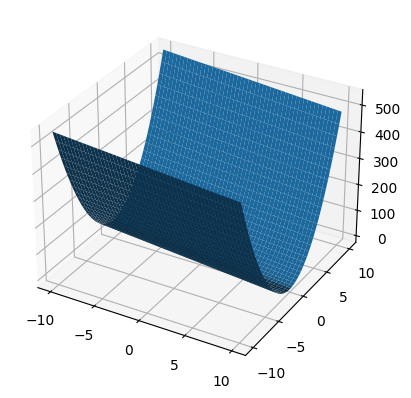

In [18]:
# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Xs1, Xs2, Ys, vmin=Ys.min() * 2)

In [19]:
# Preparing torch tensors for learning

inputs = torch.tensor(
    np.concatenate((Xs1.reshape((2500, 1)), Xs2.reshape((2500, 1))), axis=1),
    dtype=torch.float32,
)
targets = torch.tensor(Ys.reshape((2500, 1)), dtype=torch.float32)

# inputs.shape
# targets.shape

This function is non-linear and has multiple arguments, let us create a model with non-linear activation function (We'll use ReLU for that), two hidden layers instead of one and we will use Adam optimizer to speed up the process.

In [ ]:
# model definition
N_input = 2
N_hidden = 25
N_output = 1

# We will now have more hidden layers and more neurons in each of them

# TODO: dodaj odpowiednie input i output_size
model = torch.nn.Sequential(
    torch.nn.Linear(...),
    torch.nn.ReLU(),  # we need non-linear activation functions
    torch.nn.Linear(...),
    torch.nn.ReLU(),
    torch.nn.Linear(...),
    torch.nn.ReLU(),
    torch.nn.Linear(...),
    torch.nn.ReLU(),
)

# TODO: stwórz Mean Square Error criterion
criterion = ...

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # lr is the learning rate

Again, a very similar training loop, with just a bit more iterations:

In [6]:
N_epochs = 50000
loss_vals = []

# Gradient Descent
for epoch in range(N_epochs):
    # TODO: Jak wziąć aktualną predykcję z modelu?
    y_pred = ...

    # Compute and print loss
    loss = criterion(y_pred, targets)

    if epoch % 2000 == 0:
        # TODO: dodaj wypisywanie lossu i dodawanie go do listy loss_vals
        print(...)
        loss_vals.append(...)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # TODO: co należy zrobić, aby był zrobiony backward pass bazujący na loss?
    ...

    # Update the parameters
    optimizer.step()

The optimizer learns very fast the first few steps and then slows down. Again we can plot the loss function improvement over *time*

In [7]:
# TODO: jak wypisać loss_vals?
plt.plot(...)

Again, we need to test if the function we have learned is generalizing beyond the training range:

In [8]:
# Generate the test set
test_Xs1 = np.linspace(-20, 20, 15)
test_Xs2 = np.linspace(-20, 20, 15)

test_Xs1, test_Xs2 = np.meshgrid(test_Xs1, test_Xs2)

# TODO: Co należy tutaj dodać, żeby sprawdzać model na zbiorze testowym?
test_data = torch.tensor(
    np.concatenate((test_Xs1.reshape((225, 1)), test_Xs2.reshape((225, 1))), axis=1),
    dtype=torch.float32,
)
# TODO: Jak wziąć wyniki modelu dla test data?
test_output = ...

test_mesh_output = test_output.reshape((15, 15))

And let's plot the results:

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Xs1, Xs2, Ys, label="training data")
# TODO: jak stworzyć plot dla danych testowych?
ax.scatter()

We have now seen two examples, where it was relatively easy for pytorch to fit the training data and generalize beyond it in the expected manner. Let us now see some situations, where this might not be so easy.